# Computer Exercise \#2 #

## Computer Exercise 2.1 ##

### (a) The Pocket Algorithm ### 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

__Below is the perceptron algorithm:__ 

In [2]:
def perceptron_sgd(X, y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 20
    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*y[i]) <= 0:
                w = w + eta*X[i]*y[i]
    return w

### Assignment: ###
Modify the code for the perceptron algorithm to implement the pocket algorithm. To do this,
you will need to write an evaluation function to find the number of classification errors on
a dataset.
__See attempt below:__

In [3]:
def pocket_sgd(X,y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 20
    for t in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*y[i]) <= 0:
                w = w + eta*X[i]*y[i]
    return w

### (b) Random Data Over a Square ###
#### Generating 2-d Random Data in a Unit Square: ####

Two-dimensional random points from $-1$ to $+1$ along both axes.

In [4]:
X=2*np.random.rand(75,2)-1

#### Labeling Points: ####
Label points above and below a line.  Here the line is
$$ y = 0.25 + 0.5x_1 - x_2 $$


In [5]:
w = np.array([0.25, 0.5, -1])
y=(w[0] + w[1]*X[:,0] + w[2]*X[:,1] > 0).astype(int)
# Modified from given notebook to match equation
#y=(0.5*X[:,0] + 0.25*X[:,1]>0).astype(int)

### (c) Training and Test Sets ###

In [6]:
from sklearn.model_selection import train_test_split
#X_test, y_train, X_test, y_test = train_test_split(X,y,test_size=0.25)

### Exercise ###
__(i)__ From your dataset (X,y) of 75 labeled random samples over a square, create a training
set of 50 samples and a test set of 25 samples,
$$ [X_{train}, y_{train}], [X_{test}, y_{test}] $$

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=50,test_size=25)

__(ii)__ Make a scatter plot of the training set, with samples of class 1 as green and those in class
0 as blue, and draw the true discriminant function. Your plot should look something like
that shown below.

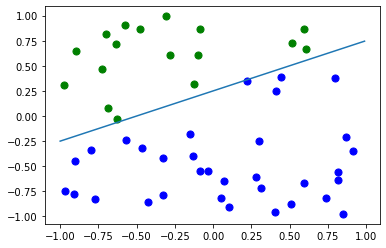

In [8]:
fig, ax = plt.subplots()
colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(X_train[y_train == n_class][:, 0],
               X_train[y_train == n_class][:, 1],
               c=colors[n_class],
               s=50,
               label=str(n_class))
xmin = -1
xmax = 1
x1 = np.arange(-1, 1, 0.01)
#x2 = (0.5*x1 + 0.25)
#x2 = (perceptron_sgd(X, y))
plt.plot(x1, (-w[0]-w[1]*x1)/w[2])

### (d) The Perceptron Learning Algorithm ###


### Experiment ###

__(i)__ Decide on the number of epochs or the stopping criterion to use, and run the perceptron
algorithm on the training data (X_train,y_train). Note that once you have instantiated
the Perceptron class, you will use the fit method. Does PLA converge? If so, how many
iterations are necessary?


In [9]:
from sklearn.linear_model import Perceptron
p = Perceptron(shuffle = True, random_state=43, max_iter=50000)
p.fit(X_train,y_train)
model = p.coef_.reshape(2,)
b = p.intercept_
print(model)

[ 1.97588771 -3.72520943]


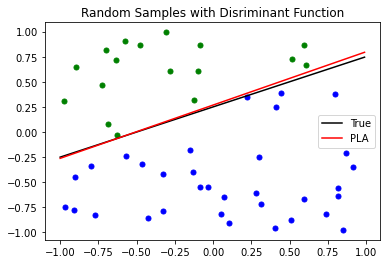

In [10]:
fig, ax = plt.subplots()
colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(X_train[y_train == n_class][:, 0], 
               X_train[y_train == n_class][:, 1], 
               c=colors[n_class], 
               s=25, 
               label=str(n_class))
x1 = np.arange(-1, 1, 0.01)
plt.plot(x1, (-w[0] - w[1]*x1)/w[2],'black')
plt.plot(x1, (-b - model[0]*x1)/model[1],'red')
ax.legend(['True','PLA'])
plt.title('Random Samples with Disriminant Function')
plt.savefig('Fig_2.pdf')

>The PLA does converge. The number of iterations taken are seen in the output below.

In [11]:
n_iter = p.n_iter_
print("Number of iterations is:")
print(n_iter)

Number of iterations is:
13


__(ii)__ Return the weight vector w and the bias b, and plot the solution along with a scatter
plot of the data. How close is the learned hypothesis to the true hypothesis?

In [12]:
weight = p.coef_
print(weight)

[[ 1.97588771 -3.72520943]]


In [13]:
print(b)

[1.]


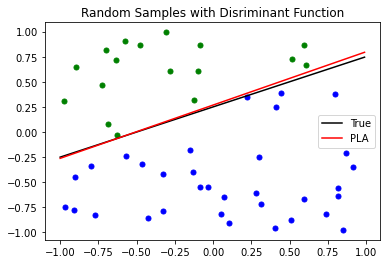

In [14]:
fig, ax = plt.subplots()
colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(X_train[y_train == n_class][:, 0], 
               X_train[y_train == n_class][:, 1], 
               c=colors[n_class], 
               s=25, 
               label=str(n_class))
x1 = np.arange(-1, 1, 0.01)
plt.plot(x1, (-w[0] - w[1]*x1)/w[2],'black')
plt.plot(x1, (-b - model[0]*x1)/model[1],'red')
ax.legend(['True','PLA'])
plt.title('Random Samples with Disriminant Function')
plt.savefig('Fig_2.pdf')

__(iii)__ What is the error on the training and test sets? Note that the score method will be
useful here.

In [15]:
accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

Training Error:
0.0
Test Error:
0.0


### (e) Nonseperable Datasets ###

### Experiment ###
__(i)__

In [16]:
X=2*np.random.rand(75,2)-1
y = (X[:,1] > X[:,0]**3 - 0.25*X[:,0]).astype(int)

__(ii)__ Separate the data set into a training set and a test set, and run the perceptron learning
algorithm on the training set.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=25)

from sklearn.linear_model import Perceptron
p = Perceptron(shuffle = True, random_state=43, max_iter=50000)
p.fit(X_train,y_train)
model = p.coef_.reshape(2,)
b = p.intercept_
print(model)




[-1.53930899  3.17148354]


__(iii)__ What is the error on the training set? What is the error on the test set?

In [18]:
accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

Training Error:
0.09999999999999998
Test Error:
0.040000000000000036


__(iv)__ Make a scatter plot of the training set along with the discriminant function g(x) and the
learned classifier $b+w^T x = 0$ . You may want to run PLA using different random number
seeds to see what difference, if any, this makes on the design. Discuss your findings.

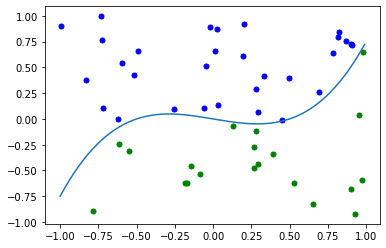

In [19]:
fig, ax = plt.subplots()
colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(X_train[y_train == n_class][:, 0], 
               X_train[y_train == n_class][:, 1], 
               c=colors[n_class], 
               s=25, 
               label=str(n_class))
# Show the boundary between the regions:
x1 = np.arange(-1, 1, 0.01)
plt.plot(x1, x1**3 - 0.25*x1)

__random_state=26__

[-0.9987849   3.25787926]
Training Error:
0.12
Test Error:
0.040000000000000036


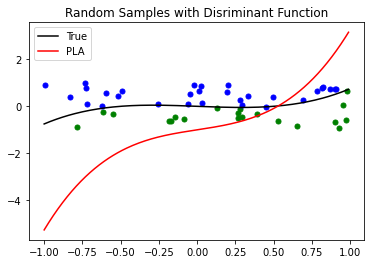

In [20]:
#X=2*np.random.rand(75,2)-1
#y = (X[:,1] > X[:,0]**3 - 0.25*X[:,0]).astype(int)

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=25)

from sklearn.linear_model import Perceptron

p = Perceptron(shuffle = True, random_state=26, max_iter=50000)
p.fit(X_train,y_train)
model = p.coef_.reshape(2,)
b = p.intercept_
print(model)

fig, ax = plt.subplots()
colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(X_train[y_train == n_class][:, 0], 
               X_train[y_train == n_class][:, 1], 
               c=colors[n_class], 
               s=25, 
               label=str(n_class))
# Show the boundary between the regions:
#x1 = np.arange(-1, 1, 0.01)
#plt.plot(x1, x1**3 - 0.25*x1)

x1 = np.arange(-1, 1, 0.01)
plt.plot(x1, x1**3 - 0.25*x1,'black')
plt.plot(x1, (-b + model[1]*x1**3 - model[0]*x1),'red')
ax.legend(['True','PLA'])
plt.title('Random Samples with Disriminant Function')
plt.savefig('Fig_2.pdf')

accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

__random_state=43__

[-1.53930899  3.17148354]
Training Error:
0.09999999999999998
Test Error:
0.040000000000000036


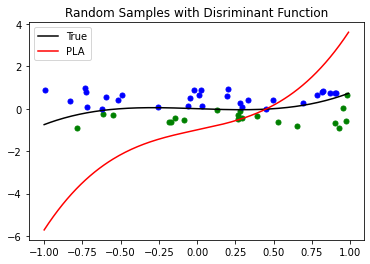

In [21]:
#X=2*np.random.rand(75,2)-1
#y = (X[:,1] > X[:,0]**3 - 0.25*X[:,0]).astype(int)

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=25)

from sklearn.linear_model import Perceptron

p = Perceptron(shuffle = True, random_state=43, max_iter=50000)
p.fit(X_train,y_train)
model = p.coef_.reshape(2,)
b = p.intercept_
print(model)

fig, ax = plt.subplots()
colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(X_train[y_train == n_class][:, 0], 
               X_train[y_train == n_class][:, 1], 
               c=colors[n_class], 
               s=25, 
               label=str(n_class))
# Show the boundary between the regions:
#x1 = np.arange(-1, 1, 0.01)
#plt.plot(x1, x1**3 - 0.25*x1)

x1 = np.arange(-1, 1, 0.01)
plt.plot(x1, x1**3 - 0.25*x1,'black')
plt.plot(x1, (-b + model[1]*x1**3 - model[0]*x1),'red')
ax.legend(['True','PLA'])
plt.title('Random Samples with Disriminant Function')
plt.savefig('Fig_2.pdf')

accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

__random_state=70__

[-1.45729407  2.90617015]
Training Error:
0.09999999999999998
Test Error:
0.040000000000000036


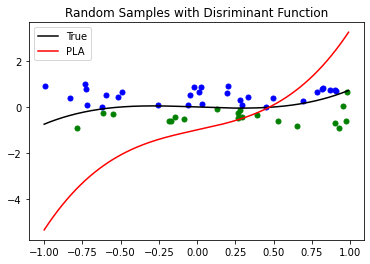

In [22]:
#X=2*np.random.rand(75,2)-1
#y = (X[:,1] > X[:,0]**3 - 0.25*X[:,0]).astype(int)

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=25)

from sklearn.linear_model import Perceptron

p = Perceptron(shuffle = True, random_state=70, max_iter=50000)
p.fit(X_train,y_train)
model = p.coef_.reshape(2,)
b = p.intercept_
print(model)

fig, ax = plt.subplots()
colors = ('green', 'blue')
for n_class in range(2):
    ax.scatter(X_train[y_train == n_class][:, 0], 
               X_train[y_train == n_class][:, 1], 
               c=colors[n_class], 
               s=25, 
               label=str(n_class))
# Show the boundary between the regions:
#x1 = np.arange(-1, 1, 0.01)
#plt.plot(x1, x1**3 - 0.25*x1)

x1 = np.arange(-1, 1, 0.01)
plt.plot(x1, x1**3 - 0.25*x1,'black')
plt.plot(x1, (-b + model[1]*x1**3 - model[0]*x1),'red')
ax.legend(['True','PLA'])
plt.title('Random Samples with Disriminant Function')
plt.savefig('Fig_2.pdf')

accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

>__Findings:__  The discriminant function g(x) is well fitted to the data. That is to say that the function is neither over fitted or under fitted to the nonseperable dataset. The boundary between the regions is a third-order polynomial which as the dataset is not linearly seperable. As the random_state changes, the PLA output is also changes every single time. However the outputs are the same for those with the same initial conditions (such as random_state). 

## Computer exercise 2.2 (The Moons Dataset and Nonlinear PLA) ## 

### Experiment ###
__(i)__ Create a moons dataset of 100 samples, with 75 in the training set and 25 in the test set using
the make_moons class in scikit learn. Set noise=0.1.

In [23]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=None)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 75, test_size=25)



__(ii)__ Make a scatter plot of the samples in the training set with the two classes marked by different
colors.

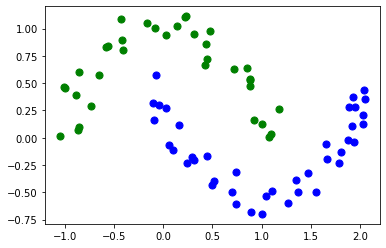

In [24]:
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(X_train[y_train == n_class][:, 0], 
               X_train[y_train == n_class][:, 1], 
               c=colors[n_class], 
               s=50, 
               label=str(n_class))
#for n_class in range(2):
#    plt.scatter(X[y==n_class][:, 0], 
#               X[y==n_class][:, 1], 
#               c=colors[n_class], 
#               s=50, 
#               label=str(n_class))

__(iii)__ Run PLA on the training set and report $w$ and plot the classifier on the scatter plot

In [25]:
from sklearn.linear_model import Perceptron
p = Perceptron(shuffle = True, random_state=43, max_iter=50000)
p.fit(X_train,y_train)
model = p.coef_.reshape(2,)
b = p.intercept_
print("w =")
print(model)

w =
[-0.02138481 -2.9707779 ]


>See $w$ in above output

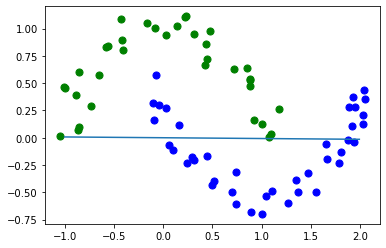

In [26]:
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(X_train[y_train == n_class][:, 0], 
               X_train[y_train == n_class][:, 1], 
               c=colors[n_class], 
               s=50, 
               label=str(n_class))

x1 = np.arange(-1, 2, 0.01)
plt.plot(x1, (-b - model[0]*x1)/model[1])

__(iv)__ Find the error of your classifier on the training set and on the test set. Are there any conclusions
that you can draw from what you find for the training and test errors?

In [27]:
accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

Training Error:
0.18666666666666665
Test Error:
0.12


> __Conclusions:__ PLA returns accuracies under 90% for both training and test data. Also, as seen in the plot drawn in part (iii), the decision boundary misclassifies a large portion of the class 1 data points. Therefore, a linear PLA is not the optimal algorithm to be used for classification. It would be best to use a PLA of a higher order polynomial instead.

__(v)__ 
> Unfortunately, I was unable to successfully write a python program to successfully implement the pocket algorithm as I ended up running out of time to complete it. 

### Experiment ###
__(i)__ For the moons training set, run PLA using a nonlinear feature space that has features
consisting of vectors of the form
$$ z = [x_1, x_2, x_1^2, x_1x_2, x_2^2]^T $$
Report w, find the training and test error, and plot the decision surface on the scatter plot as
a function of x1 and x2.

(1, 5)


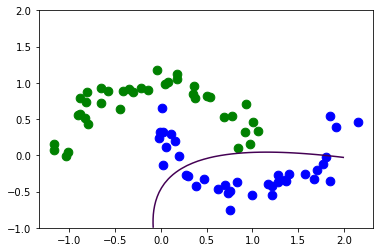

In [28]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y=make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 75, test_size=25)

#x1 = np.arange(-1, 2, 0.01)
#plt.plot(x1, (-b - model[0]*x1)/model[1])


#p = Perceptron()
#X_aug = np.append(X_train, X[:,0]*X[:,1], axis = 1)
from sklearn.linear_model import Perceptron
p = Perceptron(shuffle = True, random_state=43, max_iter=50000)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

#X=2*np.random.rand(75,2)-1
X_train=np.concatenate((X_train, X_train[:,0:1]**2, X_train[:,0:1]*X_train[:,1:2], X_train[:,1:2]**2), axis=1)
X_train.shape

X_test=np.concatenate((X_test, X_test[:,0:1]**2, X_test[:,0:1]*X_test[:,1:2], X_test[:,1:2]**2), axis=1)
X_test.shape

p.fit(X_train,y_train)
print(p.coef_.shape)
model = p.coef_.reshape(5,)
b = p.intercept_

fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(X_train[y_train == n_class][:, 0], 
               X_train[y_train == n_class][:, 1], 
               c=colors[n_class], 
               s=75, 
               label=str(n_class))
    
x1 = np.linspace(-1,2,50)
x2 = np.linspace(-1,2,50)
#print(x1)
#print(x2)
#print(x1**2)
#print(x1*x2)
X1,X2 = np.meshgrid(x1,x2)
#Z = b + model[0]*x1 + model[1]*x2 + model[2]*x1**2 + model[3]*x1*x2 +  model[4]*x2**2
Z = b + model[0]*X1 + model[1]*X2 + model[2]*X1**2 + model[3]*X1*X2 +  model[4]*X2**2
#Z = p.intercept_ + model[0]*X1 + model[1]*X2 + model[2]*X1*X2
plt.contour(X1, X2, Z, levels=[0])

#plt.plot(x1, Z)



See model $w$ below:

In [29]:
print(model)

[ 2.07104487 -2.8145396  -0.84613868 -2.69662322 -1.40631846]


In [30]:
accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

Training Error:
0.16000000000000003
Test Error:
0.31999999999999995


__(ii)__ Repeat (i) for a third-order polynomial.

(50, 50)


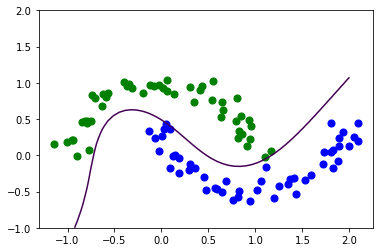

In [31]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100, shuffle=True, noise=0.1, random_state=None)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=25)
#fig, ax = plt.subplots()
for n_class in range(2):
    plt.scatter(X[y==n_class][:, 0],
               X[y==n_class][:, 1],
               c=colors[n_class],
               s=50,
               label=str(n_class))
X_train=np.concatenate((X_train, X_train[:,0:1]**2, X_train[:,0:1]**3, X_train[:,0:1]*X_train[:,1:2],X_train[:,0:1]**2*X_train[:,1:2],X_train[:,0:1]* X_train[:,1:2]**2,X_train[:,1:2]**2,X_train[:,1:2]**3), axis=1)
X_train.shape
X_test=np.concatenate((X_test, X_test[:,0:1]**2, X_test[:,0:1]**3, X_test[:,0:1]*X_test[:,1:2],X_test[:,0:1]**2*X_test[:,1:2],X_test[:,0:1]* X_test[:,1:2]**2,X_test[:,1:2]**2,X_test[:,1:2]**3), axis=1)
X_test.shape

p = Perceptron()
p.fit(X_train,y_train)
model = p.coef_.reshape(9,)
b = p.intercept_
x1 = np.linspace(-1,2,50)
x2 = np.linspace(-1,2,50)
X1,X2 = np.meshgrid(x1,x2)
X3=X1*X2
print(X3.shape)
Z = b + model[0]*X1 + model[1]*X2 + model[2]*X1**2 + model[3]*X1**3 + model[4]*X1*X2 + model[5]*X1**2*X2 + model[6]*X1*X2**2 + model[7]*X2**2 + model[8]*X2**3
plt.contour(X1,X2,Z,levels=[0])

See model $w$ below:

In [32]:
print(model)

[-4.68287589 -4.88062261 -6.85706026  7.39617382 -3.85369293 -1.55940583
 -0.09585776 -1.16718764 -2.82544533]


In [33]:
accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:", train_error)
print("Test Error:", test_error)

Training Error: 0.0
Test Error: 0.0


## Computer Exercise 2.3 (Nonlinear PLA on Circles Datasheet) ##
### Experiment ###
__(i)__ Using the circles data set with noise=0.1 and factor=0.5, run PLA (linear perceptron).

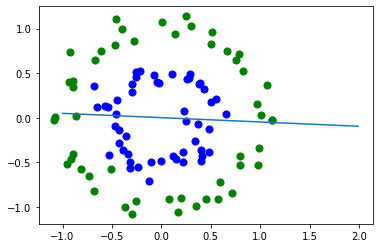

In [34]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=None,factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 75, test_size=25)

from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X_train,y_train)
model = p.coef_.reshape(2,)
b = p.intercept_

#fig, ax = plt.subplots()
for n_class in range(2):
    plt.scatter(X[y==n_class][:, 0], 
               X[y==n_class][:, 1], 
               c=colors[n_class], 
               s=50, 
               label=str(n_class))

#RUN LINEAR PERCEPTRON   
x1 = np.arange(-1, 2, 0.01)
plt.plot(x1, (model[0]*x1 - model[1]*x1))

__(ii)__ Find the training and test error, and plot the decision surface on a scatter plot of the training
set as a function of $x_1$ and $x_2$. Repeat for several different random number seeds and describe
the differences of the classifier, if any.


In [35]:
accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

Training Error:
0.48
Test Error:
0.56


Training Error:
0.48
Test Error:
0.56


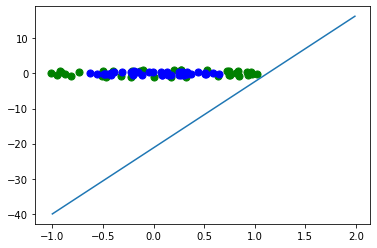

In [36]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=1,factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 75, test_size=25)

from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X_train,y_train)
model = p.coef_.reshape(2,)
b = p.intercept_

#fig, ax = plt.subplots()
for n_class in range(2):
    plt.scatter(X_train[y_train==n_class][:, 0], 
               X_train[y_train==n_class][:, 1], 
               c=colors[n_class], 
               s=50, 
               label=str(n_class))

#RUN LINEAR PERCEPTRON   
x1 = np.arange(-1, 2, 0.01)
plt.plot(x1, (-b - model[0]*x1)/model[1])

accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

Training Error:
0.48
Test Error:
0.56


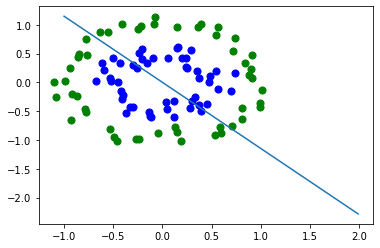

In [37]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=34,factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 75, test_size=25)

from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X_train,y_train)
model = p.coef_.reshape(2,)
b = p.intercept_

#fig, ax = plt.subplots()
for n_class in range(2):
    plt.scatter(X[y==n_class][:, 0], 
               X[y==n_class][:, 1], 
               c=colors[n_class], 
               s=50, 
               label=str(n_class))
#RUN LINEAR PERCEPTRON   
x1 = np.arange(-1, 2, 0.01)
plt.plot(x1, (-b - model[0]*x1)/model[1])

accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

Training Error:
0.52
Test Error:
0.43999999999999995


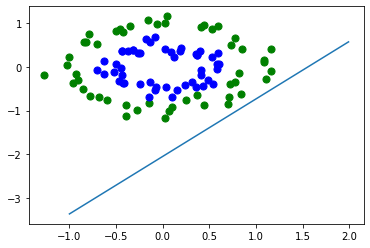

In [38]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=1000,factor=0.5)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size= 75, test_size=25)

from sklearn.linear_model import Perceptron
p = Perceptron()
p.fit(X_train,y_train)
model = p.coef_.reshape(2,)
b = p.intercept_

#fig, ax = plt.subplots()
for n_class in range(2):
    plt.scatter(X[y==n_class][:, 0], 
               X[y==n_class][:, 1], 
               c=colors[n_class], 
               s=50, 
               label=str(n_class))
#RUN LINEAR PERCEPTRON   
x1 = np.arange(-1, 2, 0.01)
plt.plot(x1, (-b - model[0]*x1)/model[1])

accuracy_1 = p.score(X_train,y_train)
accuracy_2 = p.score(X_test,y_test)

train_error = 1-accuracy_1
test_error = 1-accuracy_2

print("Training Error:")
print(train_error)
print("Test Error:")
print(test_error)

>There does not seem to be any difference between the classifiers even with differing random number seeds. As a function of x_1 and x_2 

### Question- Unbalanced Data Sets ###
If there are 3-5 times more data samples in the outer circle than there are in the inner circle, what
do you think PLA will produce as a classifier?
> The PLA will either produce a smaller circle or the PLA will consider the data from the inner circle as an outlier and disregard them.

### Experiment: ###

__(i)__ Repeat the previous experiment using a nonlinear perceptron with a nonlinear feature space
defined by vectors z of the form
$$ z = [x_1, x_2, x_1^2, x_1x_2, x_2^2]^T $$
Discuss the results and what you find.

(50, 50)


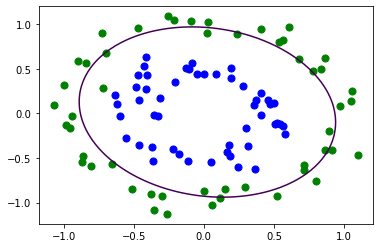

In [39]:
from sklearn.datasets import make_circles
X,y=make_circles(n_samples=100, shuffle=True, noise=0.1, random_state=None,factor=0.5)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=75,test_size=25)
#fig, ax = plt.subplots()
for n_class in range(2):
    plt.scatter(X[y==n_class][:, 0],
               X[y==n_class][:, 1],
               c=colors[n_class],
               s=50,
               label=str(n_class))
    
X_train=np.concatenate((X_train, X_train[:,0:1]**2, X_train[:,0:1]*X_train[:,1:2], X_train[:,1:2]**2), axis=1)

p = Perceptron()
p.fit(X_train,y_train)
model = p.coef_.reshape(5,)
b = p.intercept_

x1 = np.linspace(-1,1,50)
x2 = np.linspace(-1,1,50)
X1,X2 = np.meshgrid(x1,x2)
X3=X1*X2
print(X3.shape)
Z = b + model[0]*X1 + model[1]*X2 +model[2]*X1**2+ model[3]*X1*X2+model[4]*X2**2
plt.contour(X1,X2,Z,levels=[0])

__Results:__ A second-order polynomial of the form $z$ creates a circular decision boundary which separates the data points found in that are classified as class 1 and class 2 respectively. Class 1 is found on the outside of the circle while class 2 is found inside.

__(ii)__ Comment on whether or not going to a third-order polynomial will improve your classifier.

>A third-order polynomial will not improve the classifier as it is an odd polynomial and is incapable of drawing a circular boundary. Perhaps a fourth-order polynomial could improve the classifier. However, there is also a risk of overfitting the data.